In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#read the dataset to python environment

In [2]:
data=pd.read_csv("Wine_clust.csv")

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#shape of data

In [4]:
data.shape

(178, 13)

In [ ]:
#checking for missing values

In [5]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
#summary statistics

In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


K-Means Clustering model

In [ ]:
#import Cluster

In [7]:
from sklearn.cluster import KMeans

In [ ]:
#creating kmeans and iterating values from 1 to 12

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


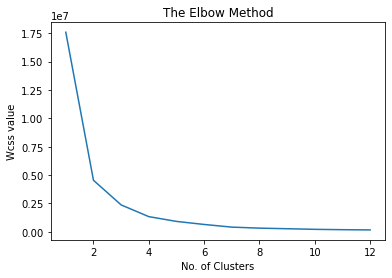

In [8]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)#calculates k-means value
plt.plot(range(1,13),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Wcss value')
plt.show()

In [9]:
# from the elbow method no of clusters=3

In [10]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data)

In [11]:
y_kmeans

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [ ]:
#import performance metrics

In [ ]:
#silhouette score

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
silh_avg=silhouette_score(data,y_kmeans)

In [36]:
print(silh_avg)

0.01993035767887275


Agglomerative Heirarchical Clustering Model

In [25]:
import scipy.cluster.hierarchy as sch

In [132]:
#find out optimum no of clusters using dendrograms

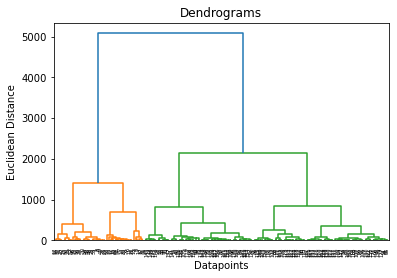

In [26]:
dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('Dendrograms')
plt.xlabel('Datapoints')
plt.ylabel('Euclidean Distance')
plt.show()

In [27]:
#from the dendrograms no of clusters=4

In [ ]:
#import model

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data)

In [30]:
y_hc

array([3, 3, 3, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 3, 2, 2, 3, 1, 2, 3, 1, 1, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2,
       2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 3, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int64)

In [ ]:
#performance metrics

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
sil_avg=silhouette_score(data,y_hc)

In [33]:
print(sil_avg)

0.5606726948394264


DBSCAN Clustering Model

In [ ]:
#import DBSCAN model

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
from sklearn import metrics

In [45]:
from sklearn.datasets import make_blobs

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
from sklearn import datasets

In [73]:
#load data in X

In [46]:
X=data

In [47]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [48]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
#Check shape of the dataframe

In [49]:
X.shape

(178, 13)

In [116]:
X,y_true=make_blobs(n_samples=178,centers=4,cluster_std=0.50,random_state=42)
db=DBSCAN(eps=0.3,min_samples=14).fit(X)
core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_]=True
labels=db.labels_

In [ ]:
#here eps is taken as 3 and minpts=14 (as minpts= Dimensions+1= 13+1=14 )

In [117]:
# number of clusters in labels,ignoring noise if present.

In [118]:
n_clusters=len(set(labels)) - (1 if -1 in labels else 0)

In [119]:
print(labels)

[-1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
  0 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [120]:
#plot the result

In [121]:
#Black is removed and is used for noise instead.

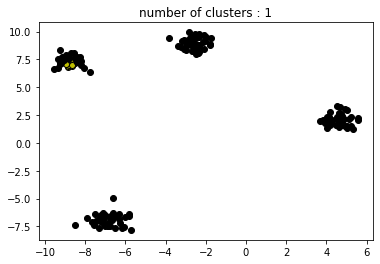

In [122]:
unique_labels=set(labels)
colors=['y','b','g','r']
for k ,col in zip(unique_labels,colors):
    if k==-1:
        #black is used as noise.
        col='k'
    class_member_mask=(labels==k) 
    
    xy=X[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=col,markeredgecolor='k',markersize=6)
    
    xy=X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=col,markeredgecolor='k',markersize=6)
plt.title('number of clusters : %d' % n_clusters)
plt.show()

In [123]:
#evaluation metrics

In [124]:
#silhouette score

In [125]:
sc=metrics.silhouette_score(X,labels)

In [126]:
print("silhouette coefficient:%0.2f"%sc)

silhouette coefficient:0.01


In [127]:
#Absolute random score

In [128]:
ari=metrics.adjusted_rand_score(y_true,labels)

In [129]:
print("Adjusted rand index: %0.2f"%ari)

Adjusted rand index: 0.04


In [ ]:
"""
In the case of K-means clustering the silhouette score is 0.01993035767887275,
for Agglomerative Heirarchical Clustering the silhouette score is 0.5606726948394264,
for DBSCAN Model the silhouette score is 0.01 and absolute random score is 0.04
"""